$\left\{\begin{array}{l}{\dot{\vec{x}}=v} \\ {{\dot{\vec{v}}}=F(x) / m}\end{array}\right.$

$F = Force$

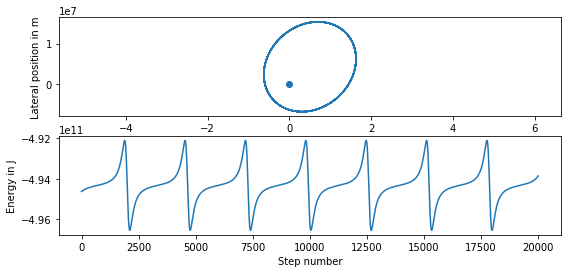

In [7]:
# QUIZ
#
# Modify the symplectic_euler function 
# below to correctly implement the 
# Symplectic Euler Method

from udacityplots import *
import numpy as np
import numpy

h = 5.0 # s
earth_mass = 5.97e24 # kg
spacecraft_mass = 30000. # kg
gravitational_constant = 6.67e-11 # N m2 / kg2

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth located at origin
    return gravitational_constant * earth_mass / numpy.linalg.norm(vector_to_earth)**3 * vector_to_earth

def symplectic_euler():
    num_steps = 20000
    x = numpy.zeros([num_steps + 1, 2]) # m
    v = numpy.zeros([num_steps + 1, 2]) # m / s
    energy = numpy.zeros(num_steps + 1) # J = kg m2 / s2

    x[0, 0] = 15e6
    x[0, 1] = 1e6    
    v[0, 0] = 2e3
    v[0, 1] = 4e3

    ############ Modify the below code
    for step in range(num_steps):
        x[step + 1] = x[step] + h * v[step] 
        v[step + 1] = v[step] + h * acceleration(x[step+1]) # +1 => symplectic
    ############ End code to modify

    for step in range(num_steps + 1):
        energy[step] = 0.5 * spacecraft_mass * numpy.linalg.norm(v[step])**2 \
                         - gravitational_constant * earth_mass * spacecraft_mass / numpy.linalg.norm(x[step])

    return x, energy

x, energy = symplectic_euler()

@show_plot
def plot_me():
    axes_positions = matplotlib.pyplot.subplot(211)
    matplotlib.pyplot.plot(x[:, 0], x[:, 1])
    matplotlib.pyplot.scatter(0, 0)
    matplotlib.pyplot.axis('equal')
    axes_positions.set_xlabel('Longitudinal position in m')
    axes_positions.set_ylabel('Lateral position in m')
    axes_energy = matplotlib.pyplot.subplot(212)
    matplotlib.pyplot.plot(energy)
    axes_energy.set_xlabel('Step number')
    axes_energy.set_ylabel('Energy in J') # 1 Joule = 1 N m = 1 kg m2 / s2
    
plot_me()


## Leapfrog try

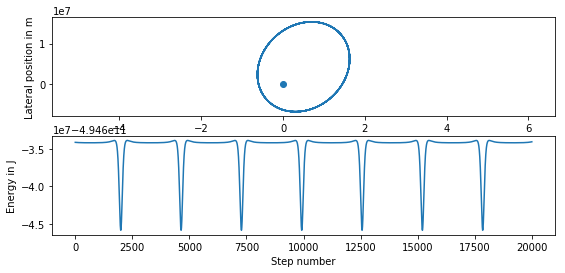

In [8]:
# QUIZ
#
# Modify the symplectic_euler function 
# below to correctly implement the 
# Symplectic Euler Method

from udacityplots import *
import numpy as np
import numpy

h = 5.0 # s
earth_mass = 5.97e24 # kg
spacecraft_mass = 30000. # kg
gravitational_constant = 6.67e-11 # N m2 / kg2

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth located at origin
    return gravitational_constant * earth_mass / numpy.linalg.norm(vector_to_earth)**3 * vector_to_earth

def symplectic_euler():
    num_steps = 20000
    x = numpy.zeros([num_steps + 1, 2]) # m
    v = numpy.zeros([num_steps + 1, 2]) # m / s
    energy = numpy.zeros(num_steps + 1) # J = kg m2 / s2

    x[0, 0] = 15e6
    x[0, 1] = 1e6    
    v[0, 0] = 2e3
    v[0, 1] = 4e3

    ############ Modify the below code
    for step in range(num_steps):
        v_inter = v[step] + h/2 * acceleration(x[step])
        x[step + 1] = x[step] + h * v_inter 
        v[step + 1] = v_inter + h/2 * acceleration(x[step+1]) # +1 => symplectic
    ############ End code to modify

    for step in range(num_steps + 1):
        energy[step] = 0.5 * spacecraft_mass * numpy.linalg.norm(v[step])**2 \
                         - gravitational_constant * earth_mass * spacecraft_mass / numpy.linalg.norm(x[step])

    return x, energy

x, energy = symplectic_euler()

@show_plot
def plot_me():
    axes_positions = matplotlib.pyplot.subplot(211)
    matplotlib.pyplot.plot(x[:, 0], x[:, 1])
    matplotlib.pyplot.scatter(0, 0)
    matplotlib.pyplot.axis('equal')
    axes_positions.set_xlabel('Longitudinal position in m')
    axes_positions.set_ylabel('Lateral position in m')
    axes_energy = matplotlib.pyplot.subplot(212)
    matplotlib.pyplot.plot(energy)
    axes_energy.set_xlabel('Step number')
    axes_energy.set_ylabel('Energy in J') # 1 Joule = 1 N m = 1 kg m2 / s2
    
plot_me()
